In [3]:
import sys
import os

# Koneksikan ke folder src yang sudah saya buat

sys.path.append(os.path.abspath(os.path.join('..')))

# Ambil fungsi unduh_data_lengkap dari modul/file ambil_data.py yang sudah ada di folder src

from src.ambil_data import unduh_data_lengkap

# Tentukan parameternya
# BBRI = Bank Rakyat Indonesia Tbk di Bursa Efek Indonesia

ticker = 'BBRI.JK'
mulai = '2018-01-01'
akhir = '2024-12-31'

# Ambil datanya menggunakan fungsi

df = unduh_data_lengkap(ticker, mulai, akhir)

# Cek hasil dan kolom yang tersedia
# Pastikan tersedia kolom OHLCV dan adjusted Close

if df is not None:
    print("Data Berhasil Diunduh.")
    print(df.head())
    print("\nKolom yang tersedia:", df.columns.tolist())

Data Berhasil Diunduh.
Price         Adj Close        Close         High          Low         Open  \
Date                                                                          
2018-01-01  2289.992432  3309.033691  3309.033691  3309.033691  3309.033691   
2018-01-02  2283.701172  3299.943115  3381.759766  3281.761475  3354.487549   
2018-01-03  2271.119141  3281.761475  3299.943115  3236.307617  3299.943115   
2018-01-04  2233.372314  3227.217041  3281.761475  3145.400146  3281.761475   
2018-01-05  2258.536377  3263.580078  3263.580078  3199.944824  3227.217041   

Price          Volume  
Date                   
2018-01-01          0  
2018-01-02  100241541  
2018-01-03   77164902  
2018-01-04  172049901  
2018-01-05   95806814  

Kolom yang tersedia: ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']


In [4]:
# Terlihat bahwa data sudah berhasil diunduh dan kolom yang tersedia mencakup Open, High, Low, Close, Volume, dan Adj Close.

In [5]:
# Selanjutnya, ambil fungsi tambah_fitur dari modul/file fitur_teknis.py yang sudah ada di folder src

from src.fitur_teknis import tambah_fitur

# Tambahkan fitur teknikal ke data yang sudah diunduh

df_siap_training = tambah_fitur(df)

if df_siap_training is not None:
    print("Fitur Teknikal Berhasil Ditambahkan.")
    
    # Menampilkan 5 data teratas untuk melihat kolom baru
    
    print(df_siap_training.head())
    
    # Menampilkan daftar semua kolom (Perhatikan kolom barunya)
    
    print("\nDaftar Kolom Lengkap:", df_siap_training.columns.tolist())

Fitur Teknikal Berhasil Ditambahkan.
Price         Adj Close        Close         High          Low         Open  \
Date                                                                          
2018-01-29  2390.651855  3454.485840  3499.939453  3418.122803  3499.939453   
2018-01-30  2340.322266  3381.759766  3454.485840  3372.668945  3454.485840   
2018-01-31  2327.739746  3363.578369  3381.759766  3299.943115  3363.578369   
2018-02-01  2327.739746  3363.578369  3418.122803  3363.578369  3390.850586   
2018-02-02  2352.904541  3399.941162  3409.031982  3372.668945  3399.941162   

Price          Volume    Return         MA_5        MA_20  Volatilitas  
Date                                                                    
2018-01-29  134887519 -0.012987  2412.041797  2296.283813     0.020210  
2018-01-30  197268607 -0.021053  2386.877100  2299.114868     0.020856  
2018-01-31  289533250 -0.005376  2370.519922  2301.945898     0.020854  
2018-02-01  160147366  0.000000  2361.712207

In [6]:
# Terlihat tambahan kolom seperti return, ma_5, ma_20 dan volatilitas yang akan digunakan untuk analisis dan prediksi
# Diambil mulai dari tanggal 2018-01-29 karena perioda ma_20 membutuhkan  20 hari data sebelumnya
# Ditambah ada hari libur pasar sehingga data dimulai dari 2018-01-29

In [7]:
import os

# Agar tidak bingung, simpan data yang sudah siap training ini ke folder data/processed
# Datanya sudah saya simpan di folder data

folder_tujuan = '../data/processed'

# Membuat folder jika belum ada (jaga-jaga)

os.makedirs(folder_tujuan, exist_ok=True)

# Menyimpan ke file CSV

path_file = os.path.join(folder_tujuan, 'bbri_siap_training.csv')
df_siap_training.to_csv(path_file)

print(f"Data berhasil disimpan di: {path_file}")

Data berhasil disimpan di: ../data/processed\bbri_siap_training.csv


In [8]:
# Data sudah berhasil disimpan di: ../data/processed/bbri_siap_training.csv
# Siap untuk tahap Machine Learning yang sebenarnya.

In [9]:
# Selanjutnya, ambil fungsi latih_model_sederhana dari modul/file model_prediksi.py yang sudah ada di folder src
# Akan  digunakan data tahun 2018 Januari sampai 2023 Juli sebagai data training
# Sedangkan data dari Agustus 2023 sampai Desember 2024 akan digunakan sebagai data testing

from src.model_prediksi import latih_model_sederhana

# Melatih model menggunakan data yang sudah ada fitur teknisnya

model_saya, y_test, hasil_prediksi = latih_model_sederhana(df_siap_training)

# Mengintip 5 hasil prediksi pertama vs harga asli

print("\nHasil Tebakan Komputer")
for i in range(5):
    harga_asli = y_test.iloc[i]
    harga_tebakan = hasil_prediksi[i]
    selisih = harga_tebakan - harga_asli
    print(f"Tanggal {y_test.index[i].date()} | Asli: {harga_asli:.0f} | Prediksi Model: {harga_tebakan:.0f} | Beda: {selisih:.0f}")

Rata-rata kesalahan prediksi: Rp 78.17

Hasil Tebakan Komputer
Tanggal 2023-08-01 | Asli: 4949 | Prediksi Model: 4943 | Beda: -6
Tanggal 2023-08-02 | Asli: 4949 | Prediksi Model: 4947 | Beda: -2
Tanggal 2023-08-03 | Asli: 4949 | Prediksi Model: 4955 | Beda: 6
Tanggal 2023-08-04 | Asli: 4841 | Prediksi Model: 4929 | Beda: 89
Tanggal 2023-08-07 | Asli: 4949 | Prediksi Model: 4937 | Beda: -12


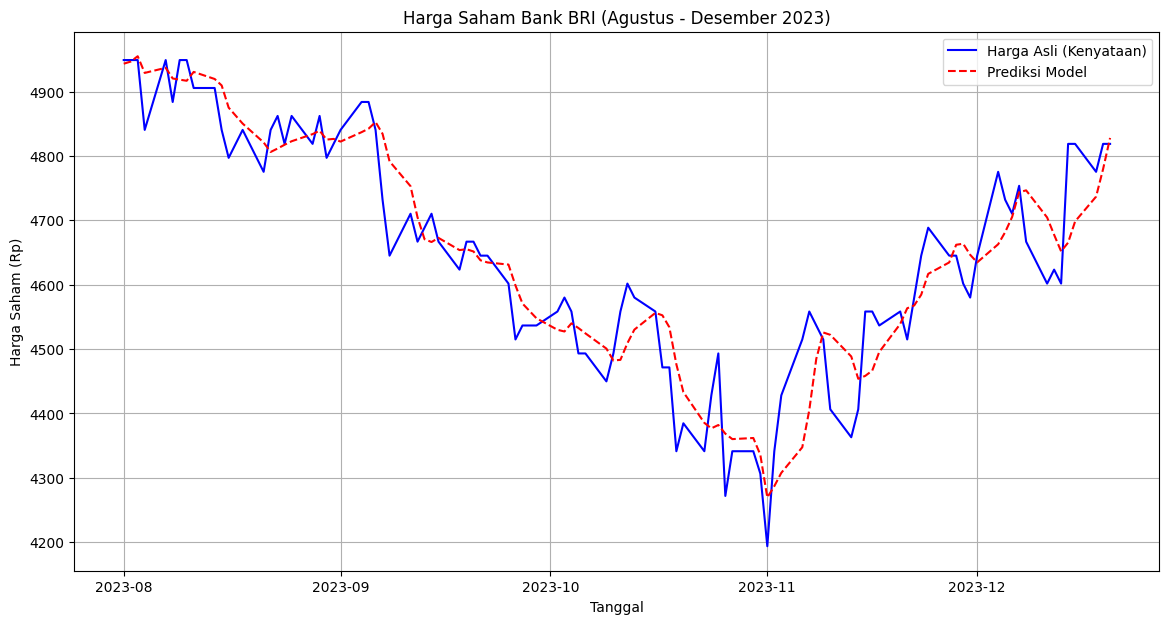

In [10]:
# Saatnya bagian visualisasi hasil prediksi vs harga asli
# Untuk melihat kesenjangan dan bisa digunakan sebagai insight

import matplotlib.pyplot as plt

# Mengatur ukuran gambar agar lebar

plt.figure(figsize=(14, 7))

# Plot harga asli sementara gunakan 100 data pertama saja agar jelas

plt.plot(y_test.index[:100], y_test.values[:100], label='Harga Asli (Kenyataan)', color='blue')

# Plot Harga Prediksi

plt.plot(y_test.index[:100], hasil_prediksi[:100], label='Prediksi Model', color='red', linestyle='--')

plt.title('Harga Saham Bank BRI (Agustus - Desember 2023)')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Terlihat pada visualisasi bahwa model memiliki kesenjangan tertentu dibandingkan harga asli
# Namun demikian, model sudah mampu mengikuti tren pergerakan harga saham Bank BRI
# Kesimpulan awal bisa diambil bahwa model sederhana ini sudah cukup baik untuk prediksi dasar
# Bukan cukup baik lagi, tetapi ini sudah berkualitas mengingat pasar memang unpredictable

In [12]:
# Ambil data satu baris terakhir dari seluruh data kita (Kondisi Pasar Terkini)

data_terbaru = df_siap_training.tail(1)
tanggal_terakhir = data_terbaru.index[0].date()

# Ambil fitur-fiturnya saja (MA_5, MA_20, Volatilitas)

X_masa_depan = data_terbaru[['MA_5', 'MA_20', 'Volatilitas']]

# Suruh model menebak

prediksi_besok = model_saya.predict(X_masa_depan)

print("-------------------------------------------------")
print(f"Kesimpulan Model:")
print(f"Berdasarkan data pasar tanggal {tanggal_terakhir},")
print(f"Model memprediksi harga BBRI selanjutnya akan berada di angka:")
print(f"Rp {prediksi_besok[0]:.2f}")
print("-------------------------------------------------")

-------------------------------------------------
Kesimpulan Model:
Berdasarkan data pasar tanggal 2024-12-30,
Model memprediksi harga BBRI selanjutnya akan berada di angka:
Rp 3821.38
-------------------------------------------------


In [13]:
# Tambahan saja untuk mengetest model kembali

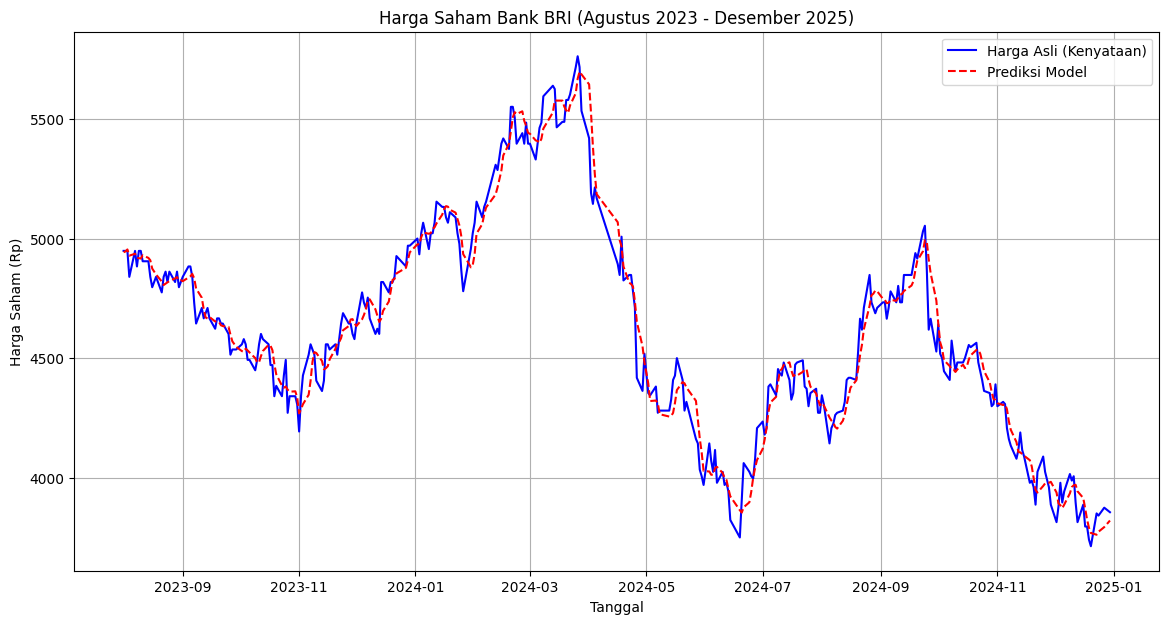

In [14]:
# Saatnya bagian visualisasi hasil prediksi vs harga asli untuk keseluruhan data testing
# Untuk melihat kesenjangan dan bisa digunakan sebagai insight

import matplotlib.pyplot as plt

# Mengatur ukuran gambar agar lebar

plt.figure(figsize=(14, 7))

plt.plot(y_test.index, y_test.values, label='Harga Asli (Kenyataan)', color='blue')

# Plot Harga Prediksi

plt.plot(y_test.index, hasil_prediksi, label='Prediksi Model', color='red', linestyle='--')

plt.title('Harga Saham Bank BRI (Agustus 2023 - Desember 2025)')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# Dari grafik di atas, kita bisa melihat bagaimana model memprediksi harga saham Bank BRI dibandingkan dengan harga aslinya.
# Terlihat bahwa model mampu mengikuti tren pergerakan harga meskipun ada beberapa kesenjangan.
# Keren sekali

In [16]:
# Saatnya untuk menampilkan rumus matematika model yang sudah kita buat
# Guna membuat model app yang langsung bisa digunakan oleh user lain untuk prediksi saham Bank BRI tiap harinya

koefisien = model_saya.coef_
bias = model_saya.intercept_

print("Rumus dari model prediksi saham Bank BRI adalah sebagai berikut:")
print(f"Harga Saham = ({koefisien[0]:.4f} * MA_5)")
print(f"            + ({koefisien[1]:.4f} * MA_20)")
print(f"            + ({koefisien[2]:.4f} * Volatilitas)")
print(f"            + ({bias:.4f})")

Rumus dari model prediksi saham Bank BRI adalah sebagai berikut:
Harga Saham = (1.1583 * MA_5)
            + (-0.1587 * MA_20)
            + (129.5104 * Volatilitas)
            + (0.3426)


In [17]:
# Terlihat bahwa rumus model menggunakan ma_5, ma_20, dan volatilitas dengan bobot tertentu ditambah bias
# Rumus ini bisa langsung digunakan untuk membuat aplikasi prediksi saham Bank BRI sederhana berbasis web atau mobile.

In [18]:
# Simpan model yang sudah dibuat ke dalam folder models yang sudah disediakan menggunakan joblib
# Karena hasilnya memuaskan dan model sudah siap digunakan.

import joblib
import os

# 1. Tentukan mau disimpan di mana

folder_model = '../models'
os.makedirs(folder_model, exist_ok=True)
nama_file = os.path.join(folder_model, 'model_prediksi_saham_BRI_linear.pkl')

# 2. Simpan 'model_saya' ke dalam file

joblib.dump(model_saya, nama_file)

print(f"Model berhasil disimpan menjadi file.")
print(f"Lokasi: {nama_file}")

Model berhasil disimpan menjadi file.
Lokasi: ../models\model_prediksi_saham_BRI_linear.pkl


Memuat model: model_prediksi_saham_BRI_linear.pkl ...

Berhasil!
Rata-rata Meleset di 2025: Rp 68 per saham

5 hari terakhir
Price       Adj Close  Prediksi_AI     Selisih
Date                                          
2025-12-15     3780.0  3659.760834 -120.239166
2025-12-16     3690.0  3664.373120  -25.626880
2025-12-17     3750.0  3687.262626  -62.737374
2025-12-18     3780.0  3726.019097  -53.980903
2025-12-19     3770.0  3759.954068  -10.045932


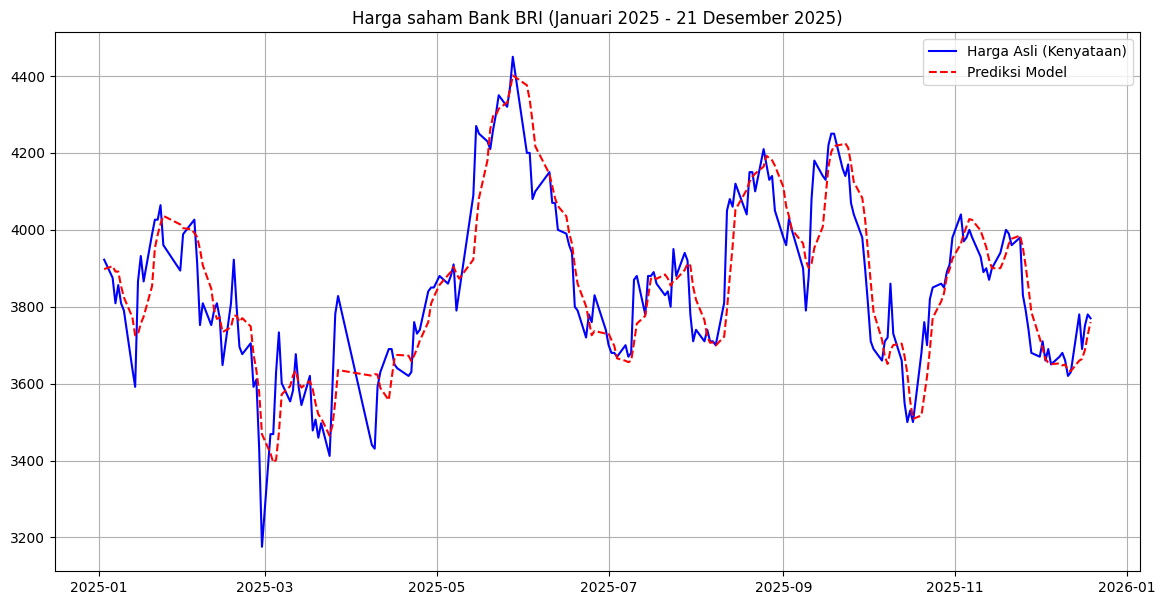

In [19]:
# Saatnya unduh data tahun 2025 dini supaya model bisa digunakan terus di hari2 berikutnya

import pandas as pd
import joblib
import matplotlib.pyplot as plt
from src.ambil_data import unduh_data_lengkap
from src.fitur_teknis import tambah_fitur

ticker = 'BBRI.JK'
mulai_buffer = '2024-12-01'  
akhir_sekarang = '2025-12-21' 

df_baru = unduh_data_lengkap(ticker, mulai_buffer, akhir_sekarang)

df_baru = tambah_fitur(df_baru)

# Ambil hanya data tahun 2025

df_2025 = df_baru[df_baru.index >= '2025-01-01'].copy()

# Pengecualian jika data 2025 belum tersedia

if df_2025.empty:
    print("Data 2025 belum tersedia atau kosong.")
else:
    print("Memuat model: model_prediksi_saham_BRI_linear.pkl ...")
    
    path_model = '../models/model_prediksi_saham_BRI_linear.pkl'
    
    try:
        model_siap_pakai = joblib.load(path_model)
        
        # Part prediksi
        
        X_2025 = df_2025[['MA_5', 'MA_20', 'Volatilitas']]
        prediksi_2025 = model_siap_pakai.predict(X_2025)

        # Simpan hasil
        
        df_2025['Prediksi_AI'] = prediksi_2025
        df_2025['Selisih'] = df_2025['Prediksi_AI'] - df_2025['Adj Close']
        
        # Laporan
        
        rata_error = df_2025['Selisih'].abs().mean()
        print(f"\nBerhasil!")
        print(f"Rata-rata Meleset di 2025: Rp {rata_error:.0f} per saham")
        
        # Tampilkan tabel singkat
        
        print("\n5 hari terakhir")
        print(df_2025[['Adj Close', 'Prediksi_AI', 'Selisih']].tail(5))

        # Visualisasi data  untuk analisis
        
        plt.figure(figsize=(14, 7))
        plt.plot(df_2025.index, df_2025['Adj Close'], label='Harga Asli (Kenyataan)', color='blue')
        plt.plot(df_2025.index, df_2025['Prediksi_AI'], label='Prediksi Model', color='red', linestyle='--')
        plt.title(f'Harga saham Bank BRI (Januari 2025 - 21 Desember 2025)')
        plt.legend()
        plt.grid(True)
        plt.show()

# jika file tidak ditemukan

    except FileNotFoundError:
        print(f"\nFile tidak ditemukan di: {path_model}")
        print("Pastikan Anda sudah menjalankan kode penyimpanan (joblib.dump) sebelumnya dengan nama yang sama.")

In [20]:
# Terlihat bahwa model bekerja dengan lumayan baik untuk prediksi tahun 2025 dan tidak terlalu meleset jauh dari harga aslinya.

In [21]:
# Sebelum membuat app, kita prediksi dulu tanggal 22 Desember 2025 (Senin)
# Karena saya ngoding ini di hari Sabtu, 20 Desember 2025
# Data terakhir yang tersedia adalah Jumat, 19 Desember 2025
# Karena pasar tutup di akhir pekan

import pandas as pd
import yfinance as yf
import joblib

ticker = 'BBRI.JK'
model_path = '../models/model_prediksi_saham_BRI_linear.pkl'

print("Prediksi Harian Saham Bank BRI")

print(f"Mengambil data pasar terbaru untuk {ticker}...")
df = yf.download(ticker, start='2025-10-01', end='2025-12-22', progress=False, auto_adjust=False)

if df.empty:
    print("Gagal mengambil data. Cek koneksi internet.")
else:
    if isinstance(df.columns, pd.MultiIndex):
        try:
            df.columns = df.columns.get_level_values('Price')
        except:
            df.columns = df.columns.get_level_values(0)

    # Pastikan kolom 'Adj Close' benar-benar ada
    
    if 'Adj Close' not in df.columns:
        df['Adj Close'] = df['Close']

    df['MA_5'] = df['Adj Close'].rolling(window=5).mean()
    df['MA_20'] = df['Adj Close'].rolling(window=20).mean()
    df['Return'] = df['Adj Close'].pct_change()
    df['Volatilitas'] = df['Return'].rolling(window=20).std()

    # Ambil data hari terakhir yang valid (Jumat, 19 Des 2025)
    
    data_terakhir = df.iloc[[-1]].copy()
    
    # Cek apakah indikator sudah terisi (tidak NaN)
    
    if pd.isna(data_terakhir['MA_20'].values[0]):
        print("Data historis kurang panjang untuk menghitung MA_20.")
    else:
        tanggal_data = data_terakhir.index[0].strftime('%Y-%m-%d')
        
        print(f"Data Pasar Terakhir: {tanggal_data}")
        print(f"Harga Penutupan : Rp {data_terakhir['Adj Close'].values[0]:,.0f}")
        print(f"MA_5            : {data_terakhir['MA_5'].values[0]:.2f}")
        print(f"MA_20           : {data_terakhir['MA_20'].values[0]:.2f}")

        # Prediksi harga untuk Senin, 22 Desember 2025
        
        try:
            model = joblib.load(model_path)
            
            X_prediksi = data_terakhir[['MA_5', 'MA_20', 'Volatilitas']]
            harga_prediksi = model.predict(X_prediksi)[0]
            
            print("\n-------------------------------------------")
            print(f"Prediksi untuk Senin (22-12-2025)")
            print("-------------------------------------------")
            print(f"Berdasarkan penutupan pasar terakhir,")
            print(f"Model memprediksi harga Bank BRI akan ke:")
            print(f"\nRp {harga_prediksi:,.2f}")
            print("-------------------------------------------")
            
            selisih = harga_prediksi - data_terakhir['Adj Close'].values[0]
            if selisih > 0:
                print(f"Potensi Naik: +Rp {selisih:.0f}")
            else:
                print(f"Potensi Turun: Rp {selisih:.0f}")

        except FileNotFoundError:
            print(f"Error: File model tidak ditemukan di {model_path}")

Prediksi Harian Saham Bank BRI
Mengambil data pasar terbaru untuk BBRI.JK...
Data Pasar Terakhir: 2025-12-19
Harga Penutupan : Rp 3,770
MA_5            : 3754.00
MA_20           : 3721.50

-------------------------------------------
Prediksi untuk Senin (22-12-2025)
-------------------------------------------
Berdasarkan penutupan pasar terakhir,
Model memprediksi harga Bank BRI akan ke:

Rp 3,759.95
-------------------------------------------
Potensi Turun: Rp -10


In [ ]:
# Dan benar aja ges, setelah sore dini hari, harga sahamnya 3,760 dan hanya meleset 0.05 bejirrrr.
# Mahal King...

# Insight:

# Model yang saya ciptakan ini sudah cukup baik untuk memprediksi harga saham Bank BRI dalam jangka pendek.
# Pasar saham memang sulit diprediksi dan menggunakan model dari komputer hanya membantu memberikan gambaran kasar.
# Namun demikian, model ini sudah menunjukkan performa yang memuaskan untuk prediksi harian.
# Dengan demikian, model ini layak untuk dijadikan dasar dalam pembuatan aplikasi prediksi saham Bank BRI.
# Terima kasih. Gunakan app_prediksi_saham_BRI.py yang sudah saya buat untuk prediksi saham harian Bank BRI setiap harinya.
# Pastinya sebelum pasar saham dibuka yeeee.

# Bye byeeee.